In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

True

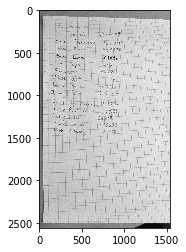

In [2]:
#wczytaj i do szarości
im = cv2.imread('data/img_24.jpg')
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
cv2.imwrite('step1.jpg', gray)

True

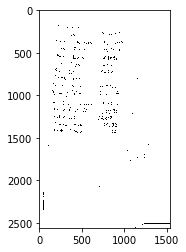

In [3]:
#filtr medianowy i adaptatywne progowanie
blur_gray = cv2.medianBlur(gray,5)
thresh = cv2.adaptiveThreshold(blur_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 20)
plt.imshow(thresh, cmap='gray')
cv2.imwrite('step2.jpg', thresh)

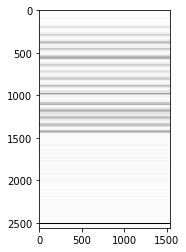

In [16]:
#suma w wierszach i przeskalowanie zakresu wartości
integral = np.sum(thresh, axis=1)
integral = integral / np.max(integral)*255
#utworzenie obrazu o oryginalnym rozmiarze
rep=np.transpose(np.tile(integral,(im.shape[1],1)))
rep = np.uint8(rep/np.max(rep)*255)

cv2.imwrite('step3.png', rep)
plt.imshow(rep, cmap='gray')

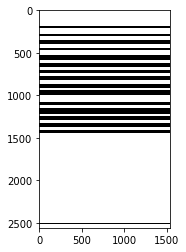

In [17]:
#progowanie w punkcie średniej obrazu i rozszerzenie obszarów białych
ret,rep = cv2.threshold(rep, np.mean(rep),255,cv2.THRESH_BINARY)
#rep=cv2.dilate(rep, kernel=np.ones(shape=(11,1)))

cv2.imwrite('step4.png', rep)
plt.imshow(rep, cmap='gray')

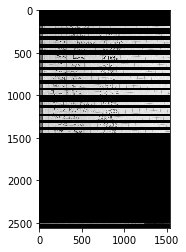

In [18]:
#wstawienie tam gdzie jest czarno obrazu oryginalnego
rep=np.where(rep < 127, gray, 0)

cv2.imwrite('step5.png', rep)
plt.imshow(rep, cmap='gray')